# Example Strategy/Backtest

#### Imports

In [9]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 
import tabulate
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import analytics.tears as tears
from IPython.display import display
from Queue import Queue
from utils.stock import Stock
from stock_backtest.data_handler import StockBacktestDataHandler
from stock_backtest.execution_handler import StockBacktestExecutionHandler
from stock_backtest.backtest import StockBacktest
from strategies.buy_strategy import BuyStrategy
import analytics.plotting as plot
from analytics.plotting import plot_holdings

## Run the backtest 

In [2]:
events = Queue()
products = [Stock('MSFT'), Stock('ORCL')]
symbols = [product.symbol for product in products]
start_date = dt.datetime(year=2012, month=1, day=1)
end_date = dt.datetime(year=2016, month=1, day=10)
data = StockBacktestDataHandler(events, symbols, start_date, end_date)
execution = StockBacktestExecutionHandler(events)
strategy = BuyStrategy(events, data, products, initial_cash=100000)
backtest = StockBacktest(events, strategy, data, execution, start_date, end_date)
backtest.run()

STARTING BACKTEST 
Strategy: BuyStrategy 
Execution: StockBacktestExecutionHandler 
Start: 1/1/2012 00:00, End: 1/10/2016 00:00 



In [5]:
positions_cols = [product.symbol for product in products] + ['cash']
positions = pd.DataFrame(np.array([strategy.time_series[product.symbol] for product in products]
                         + [strategy.time_series['cash']]).transpose(), columns=positions_cols,
                         index=strategy.time_series.index)
display(positions.tail(5))
display(strategy.transactions.tail(5))
display(strategy.time_series.tail(5))

,MSFT,ORCL,cash
dt,,,
2016-01-04,59806.320000,38890.797840,38360.830055
2016-01-05,58006.080000,37366.121042,42173.609979
2016-01-06,61653.200000,35677.500000,39160.960016
2016-01-07,62396.801184,35038.500000,36889.780016
2016-01-08,64572.208767,34040.970969,35188.729967


,amount,price,symbol
dt,,,
2016-01-06,-11.0,35.500000,ORCL
2016-01-07,49.0,52.700001,MSFT
2016-01-07,-25.0,35.250000,ORCL
2016-01-08,46.0,52.369999,MSFT
2016-01-08,93.0,35.130001,ORCL


,MSFT_mkt,ORCL_mkt,MSFT_pos,ORCL_pos,cash,MSFT,ORCL,total_val,returns
dt,,,,,,,,,
2016-01-04,54.320000,36.009998,1101.0,1080.0,38360.830055,59806.320000,38890.797840,137057.947895,-0.019951
2016-01-05,54.930000,35.860001,1056.0,1042.0,42173.609979,58006.080000,37366.121042,137545.811021,0.003560
2016-01-06,54.320000,35.500000,1135.0,1005.0,39160.960016,61653.200000,35677.500000,136491.660016,-0.007664
2016-01-07,52.700001,35.250000,1184.0,994.0,36889.780016,62396.801184,35038.500000,134325.081200,-0.015873
2016-01-08,52.369999,35.130001,1233.0,969.0,35188.729967,64572.208767,34040.970969,133801.909703,-0.003895


Backtest Months: 48


Performance statistics,Backtest
annual_return,0.08
annual_volatility,0.12
sharpe_ratio,0.67
calmar_ratio,0.56
stability_of_timeseries,0.93
max_drawdown,-0.13
omega_ratio,1.15
sortino_ratio,0.99
skew,-0.05
kurtosis,10.42


Worst Drawdown Periods,net drawdown in %,peak date,valley date,recovery date,duration
0,13.33,2014-11-14,2015-08-24,2015-11-04,254
1,6.37,2014-09-12,2014-10-16,2014-11-05,39
2,5.45,2015-12-17,2016-01-08,NaT,NaN
3,5.33,2014-04-02,2014-04-11,2014-06-06,48
4,4.81,2014-07-23,2014-08-06,2014-08-20,21




[-0.015 -0.029]


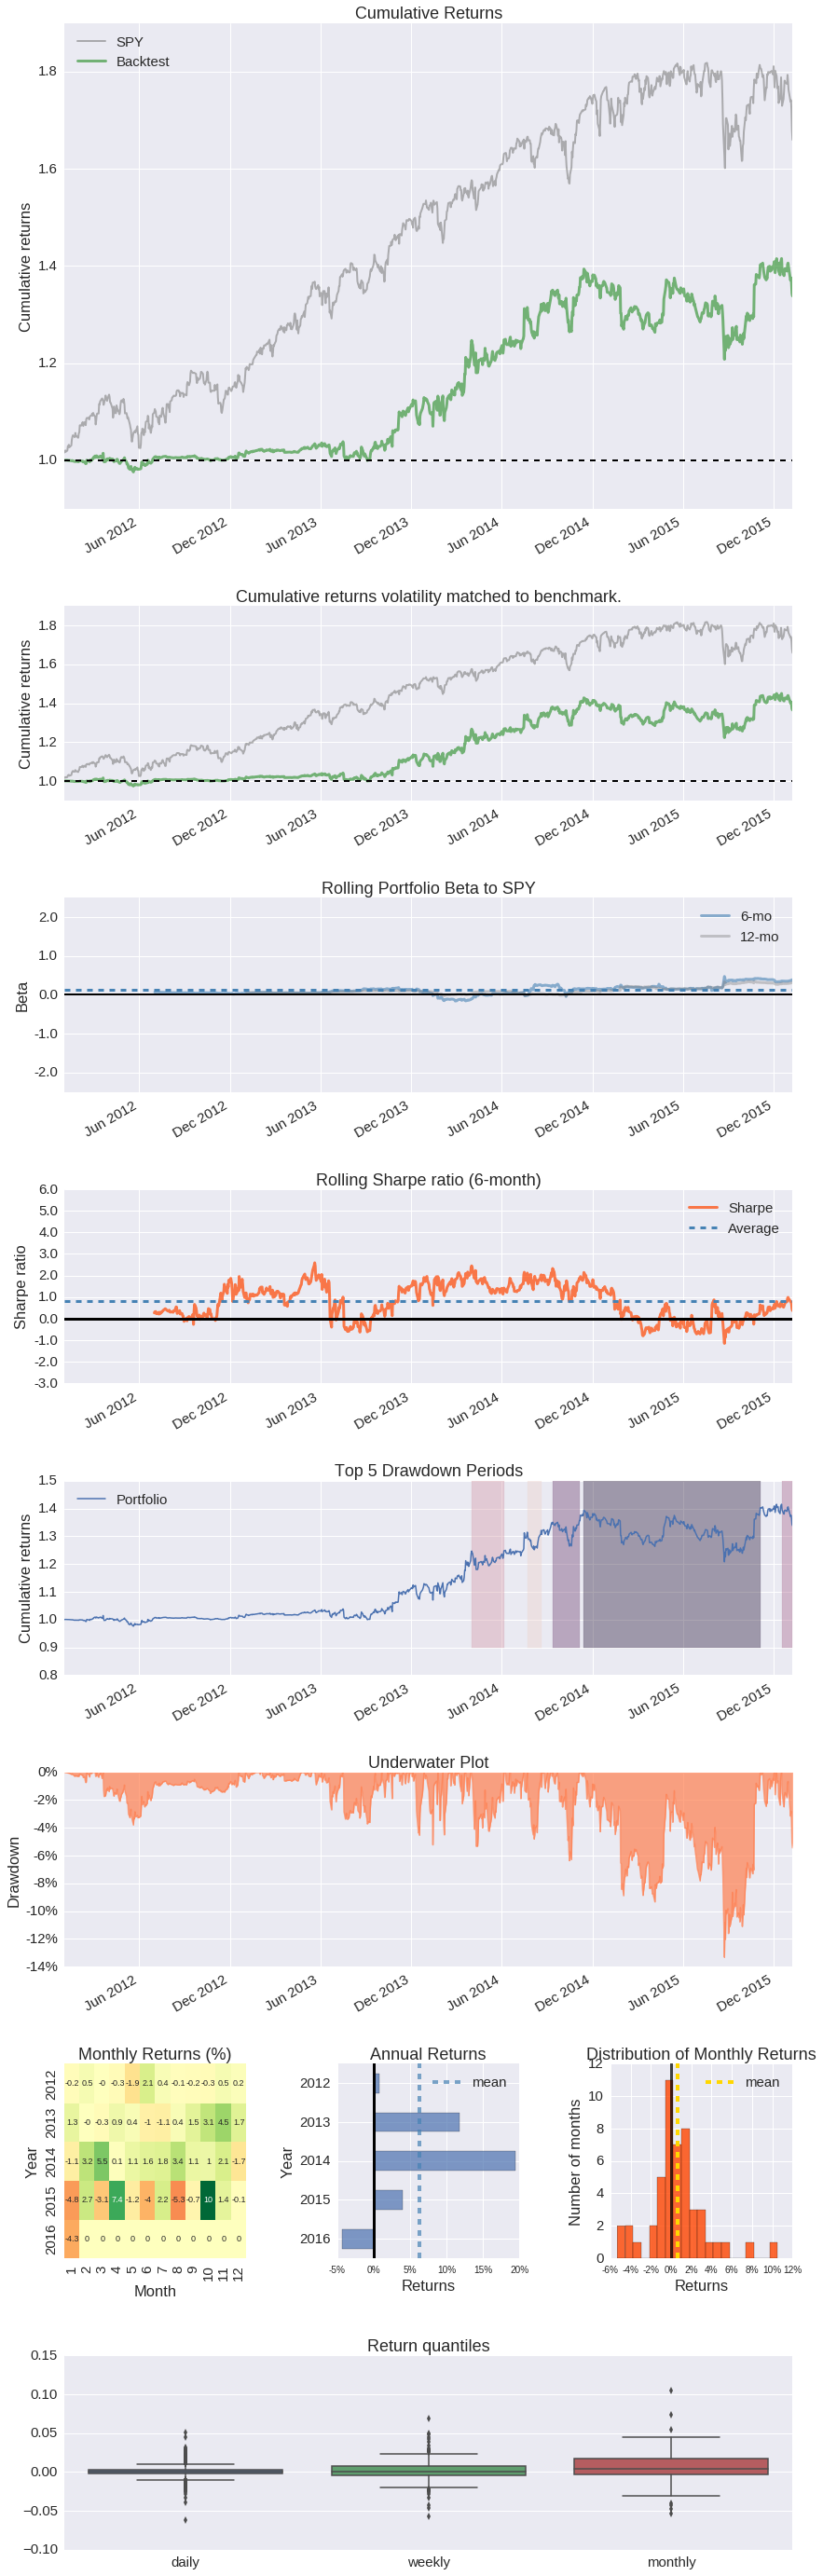

In [6]:
returns_tear = tears.create_returns_tear_sheet(strategy.time_series['returns'])

/home/dingdong/dev/backtester/analytics/plotting.py:1038: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  **kwargs)


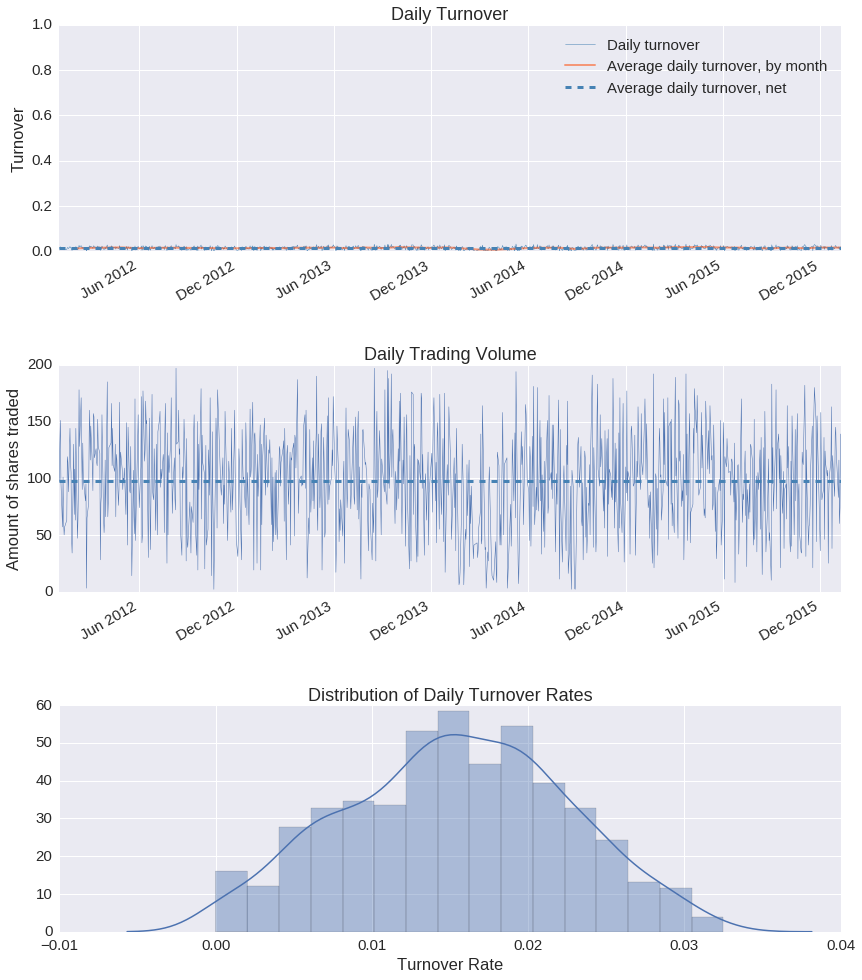

In [7]:
transactions_tear = tears.create_txn_tear_sheet(strategy.time_series['returns'], positions, strategy.transactions)

                       duration           pnl    returns
count                        50     50.000000  50.000000
mean    58 days 15:21:35.080000    562.515993  -0.001745
std    196 days 18:50:55.705800   4530.293791   0.018940
min             0 days 23:59:59 -10095.469986  -0.047857
25%             0 days 23:59:59    -16.660024  -0.012707
50%             4 days 11:59:59     -0.809996   0.000475
75%            13 days 23:59:59     30.202609   0.009291
max          1233 days 00:00:00  29188.279554   0.039253
Percent of round trips profitable = 50.0%
Mean return per winning round trip = 0.01328
Mean return per losing round trip = -0.01677
A decision is made every 20.22 days.
0.04946 trading decisions per day.
1.039 trading decisions per month.


/home/dingdong/dev/backtester/analytics/plotting.py:1378: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  ascending=False),


Profitability (PnL / PnL total) per name,pnl
symbol,
MSFT,1.06%
ORCL,-0.06%


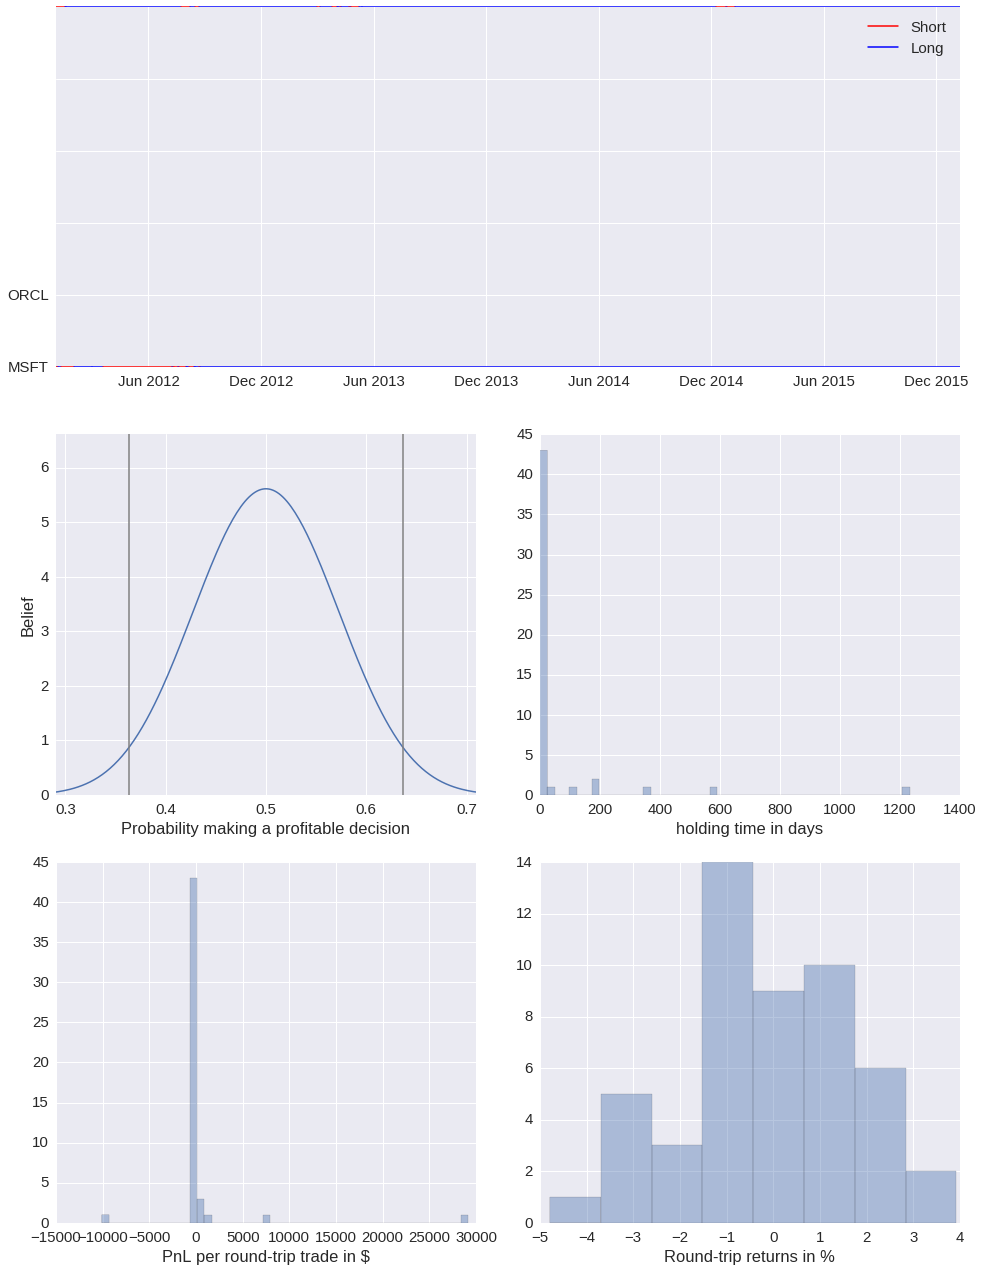

In [8]:
round_trips_tear = tears.create_round_trip_tear_sheet(positions, strategy.transactions)